In [1]:
import tensorflow as tf


In [4]:
# lets load the fmnist dataset
f_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = f_mnist.load_data() # images are inputs and labels are outputs

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer
    tf.keras.layers.Dense(128, activation=tf.nn.relu), # hidden layer
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) # output layer
])


c:\Users\USER\miniconda3\envs\tf_env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [8]:
# Summarize the load dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


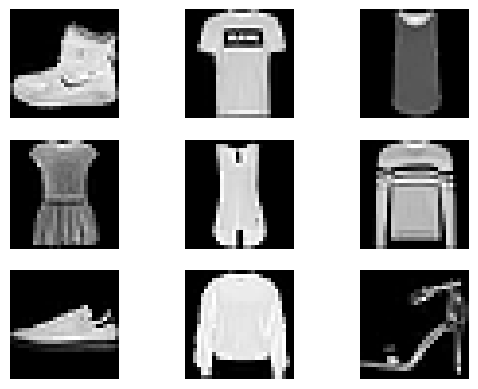

In [11]:
# plot the first image from the training dataset
import matplotlib.pyplot as plt

for i in range(9):
    # define subplot
    plt.subplot(330+ 1 +i)
    # plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    # show the figure or plot
    plt.axis('off')

In [ ]:
# preprocess the data by normalizing the pixel values to be between 0 and 1 by dividing by 255.0 
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# create the model   # *** Most important part ***
# flatten layer is used to convert 2D array to 1D array
# why we out relu in the hidden layer because it start with 0 and go to infinity
# softmax is used in the output layer because it give the probability of each class and has multiple classes
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer
    tf.keras.layers.Dense(128, activation=tf.nn.relu), # hidden layer
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) # output layer
])

In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
model.fit(X_train, y_train, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7793 - loss: 0.6350
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8617 - loss: 0.3853
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8776 - loss: 0.3398
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8861 - loss: 0.3064
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8934 - loss: 0.2921
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8781 - loss: 0.3418
Test accuracy: 0.8762000203132629


In [13]:
# Train the model
model.fit(X_train, y_train, epochs=10)
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8957 - loss: 0.2774
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9015 - loss: 0.2632
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9087 - loss: 0.2488
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9098 - loss: 0.2440
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9127 - loss: 0.2362
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9145 - loss: 0.2276
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9182 - loss: 0.2192
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9199 - loss: 0.2150
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9220 - loss: 0.2100
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9242 - loss: 0.2012
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8769 - loss: 0.3723
Test accuracy: 0.8747000098228455


In [15]:
# Make predictions with model
predictions = model.predict(X_test)

# print the shape of the predictions array
print(predictions.shape)

# print the first 10 predictions
print(predictions[:10])

# Convert the predictions to class labels
class_lables = [tf.argmax(prediction).numpy() for prediction in predictions]

# print the first 10 class labels
print(class_lables[:10])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 10)
[[7.72427393e-06 1.44405619e-13 9.07593556e-10 1.89698235e-12
  1.12795595e-08 6.47104986e-04 4.48363870e-08 4.78533134e-02
  9.27583983e-08 9.51491714e-01]
 [2.63395981e-04 1.25650398e-17 9.98389363e-01 2.66189712e-13
  9.16829449e-04 3.65800133e-11 4.30514076e-04 7.02786093e-11
  7.49214980e-13 2.72049486e-16]
 [2.60418705e-12 1.00000000e+00 1.87927415e-16 4.30302564e-11
  1.27541338e-16 6.40087451e-29 4.72584669e-16 3.70619476e-37
  7.10788460e-15 2.77166597e-28]
 [7.95148669e-10 9.99999762e-01 5.49104273e-13 2.01435540e-07
  1.32888316e-13 1.97111703e-22 3.55124133e-12 9.72573933e-31
  9.72374443e-14 1.23417068e-23]
 [2.24622637e-02 1.26485830e-07 4.42977005e-04 1.05201208e-03
  1.29363069e-03 4.39126846e-10 9.74744260e-01 3.74846643e-09
  4.68544295e-06 2.28468942e-08]
 [5.04818809e-09 1.00000000e+00 2.16078002e-12 3.64370811e-10
  7.77594135e-12 2.24832497e-21 8.76361761e-11 1.67661908e-26
  3.41268268e-12 5.25017674e-20]
 [1.1

Epoch 1/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7735 - loss: 0.6482 - val_accuracy: 0.8636 - val_loss: 0.3849
Epoch 2/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8574 - loss: 0.3927 - val_accuracy: 0.8664 - val_loss: 0.3802
Epoch 3/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8759 - loss: 0.3415 - val_accuracy: 0.8760 - val_loss: 0.3402
Epoch 4/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8812 - loss: 0.3202 - val_accuracy: 0.8770 - val_loss: 0.3354
Epoch 5/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8890 - loss: 0.3038 - val_accuracy: 0.8904 - val_loss: 0.3143
Epoch 6/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8951 - loss: 0.2819 - val_accuracy: 0.8780 - val_loss: 0.3248
Epoch 7/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8987 - loss: 0.2729 - val_accuracy: 0.8808 - val_loss: 0.3205
Epoch 8/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9047 - loss: 0.2564 - 

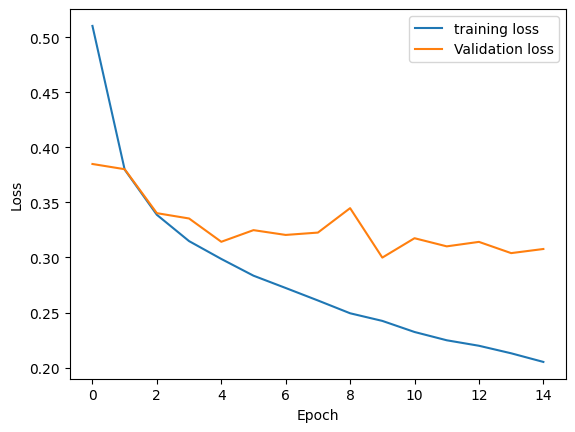

In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Preprocess the data by normalizing the pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Split the training data into training and validation sets
X_val = X_train[:5000]
y_val = y_train[:5000]
X_train = X_train[5000:]
y_train = y_train[5000:]

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer
    tf.keras.layers.Dense(128, activation=tf.nn.relu), # hidden layer
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) # output layer
])
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model with validation data and save the training history
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val))

# Plot the training and validation loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()




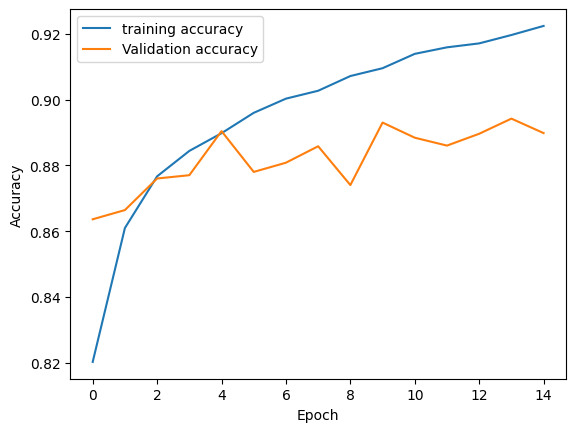

In [21]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
# evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8854 - loss: 0.3360
Test loss: 0.3389650583267212
Test accuracy: 0.8858000040054321
